# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab/abtest.csv')
# returns the first 10 rows
df.head(10)

NameError: ignored

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
#This function shows us the shape of the dataframe
df.shape

(1898, 9)

#### Observations:
We can find the shape of the data frame which then tells us the number of rows, 1898, and number of columns, 9.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   revenue                1898 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 148.4+ KB


#### Observations:
The columns:
* order_id, customer_id, food_preparation_time, and delivery_time are all integers meaning they are whole numbers.
*cost_of_the_order is a float meaning they are numbers with decimal places.
* restaurant_name, cuisine_type, day_of_the_week, and rating are objects with are string or words.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# isnull() tells us whether the data is missing then .sum() adds up those missing points.
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
By using .isnull().sum() we can see that every column of our dataframe has no missing values. If there was any missing values we would have to fix that and depending on the variable would depend on the method. As an example, if it was cost we could look at similar order and use the mean to fill in any missing values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T
#.T transposes the graph and makes it easier to read for me

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
* The minimum time it takes food to be prepared is 20 and I presume 20 minutes.
* The average time it takes food to be prepared is 27.37 minutes
* The maximum time it takes good to be prepared is 35 minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
By using the count_values() function we can see that out of the 1898 order 738 of them were not given a review. Which maybe the company could promote the use of giving ratings so that the restaurants have more accurate reviews.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

###**Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

## Customer_id

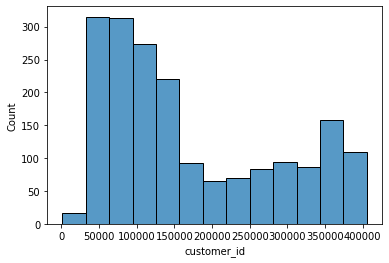

In [ ]:
sns.histplot(data=df, x='customer_id');
#Order ID and Customer ID cannot easily be graphed during univariate exploration because of the size of unique values of each category.
#So for example we can plot this histogram and see that the customer ids between 30,000 and 150,000 have the most order, but we cannot infer anything without more information.
#Do the customer ids mean something or are they randome numbers without that knowledge the graph means nothing.
#A count plot does help us figure out which customer orders the most, but it is every illegible because of the size of unique values.

##Order_id

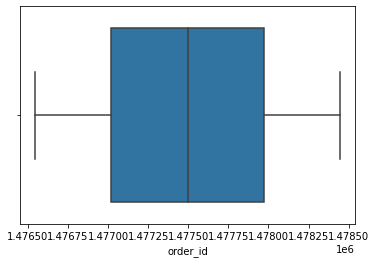

In [ ]:
sns.boxplot(data=df, x='order_id');
#Same reasoning for the customer id there isnt much we can do with this data since the order id is a unqiue number for each order. 

## Restaurant_name

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 142 missing from current font.
  font.set_text(s, 0, flags=flags)


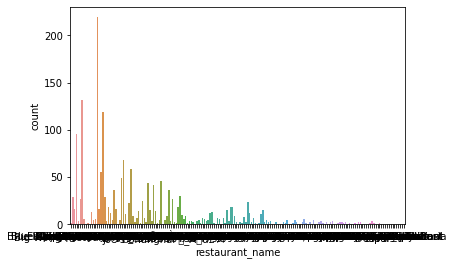

In [ ]:
sns.countplot(data=df, x='restaurant_name');
# There are two many restaurants to have a coherent, legible graph, unless we make it super big. There are easier ways to find out which restaurant is most popular. (Look at question 7)

## Cuisine_type

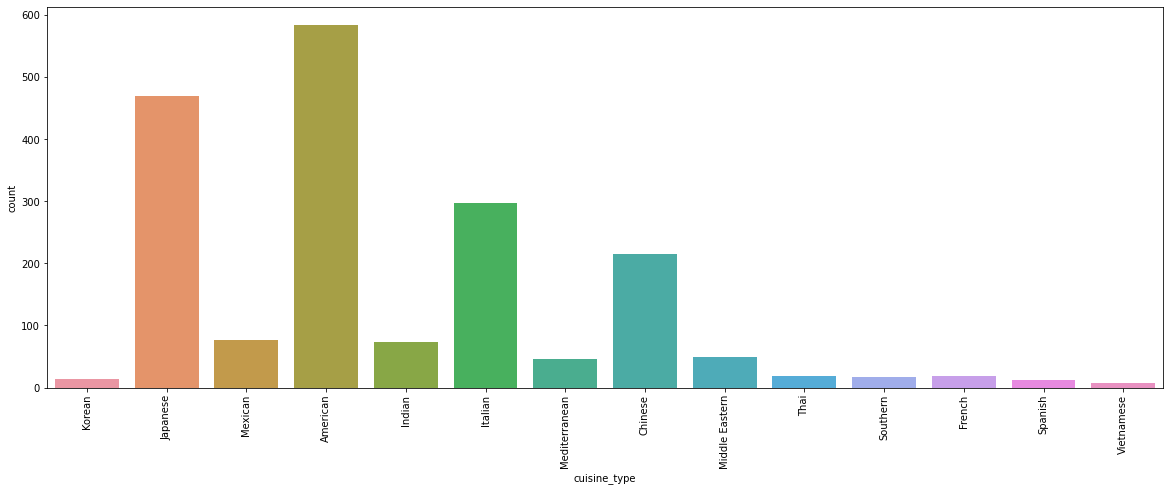

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type');
plt.xticks(rotation=90)
plt.show()
#Using a count plot to see what resturants are the most popular. Needed to make the graph bigger and rotate the x labels to make the graph legible.
# And we can clearly see that the top 3 most popular cusisines are American, Japanese, and Italian

## Cost_of_the_order

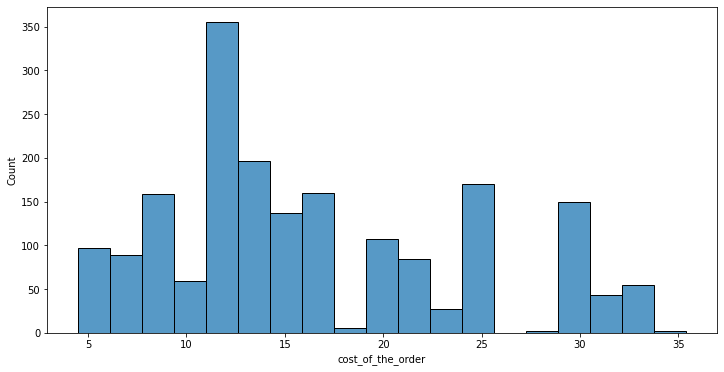

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='cost_of_the_order');
#Since the cost of an order is a float a histogram is good a showing the cost of orders in between a small range. 
#So in our graph we can see that the bin with the highest count is from about 11 to 12.5 dollars.

##Day_of_the_week

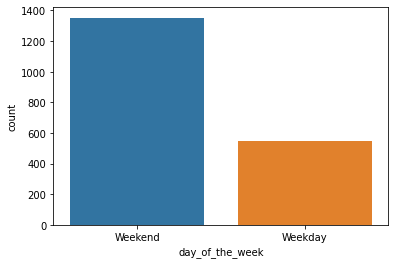

In [ ]:
sns.countplot(data=df, x='day_of_the_week');
#We can clearly see that a majority of the orders will happen on the weekend. If I had to take a guess its due to people not wanted to leave the house and wanted to relax on the weekend.

##Rating

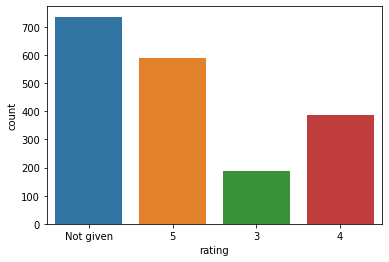

In [ ]:
sns.countplot(data=df, x='rating');
#Using a count plot it becomes easy to compare the ratings next to each other. We can see that no order has been rated less than 3.
# We can also see that the highest count category of rating is Not given meaning most people do not rate their order.

##Food_preparation_time

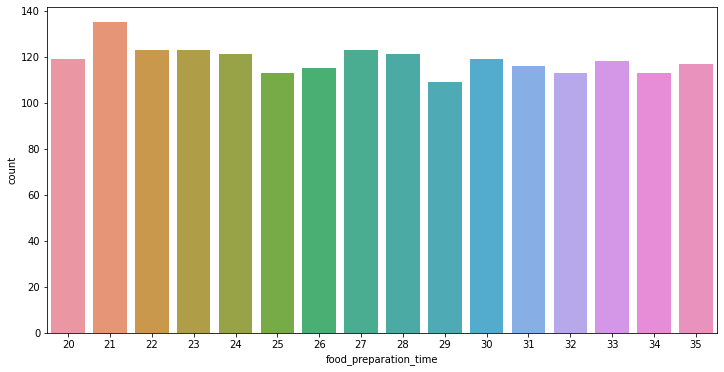

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='food_preparation_time');
#Since food preparation time is an int ranging from 20 to 35 a count plot works well to see how many orders take a certain amount of time to prepare.
#The plot is pretty flat meaning that each time column has the same amount of orders meaning there isnt one time that is an outlier.

##Delivery_time

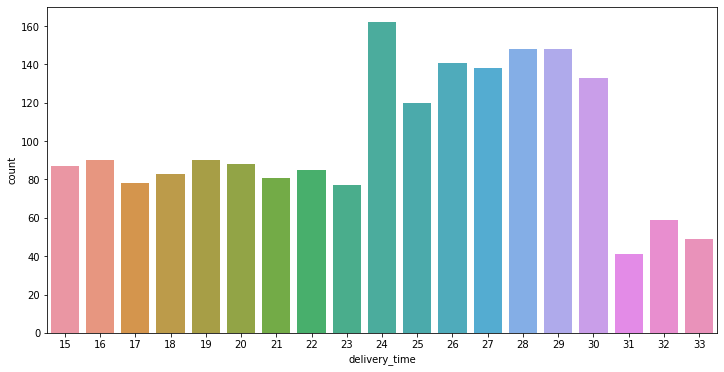

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='delivery_time');
# Just like in the food preparation time a count plot is good for delivery time too. You can clearly see the amount of time and how many orders it has.
#It is more frequent for the delivery time to fall into the region of 24 to 30 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:
The top five restaurants in terms of the number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm. The graph is a little hectic and illegible, so value_counts() function is easier.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#df.groupby(['cuisine_type'])['day_of_the_week'].value_counts()

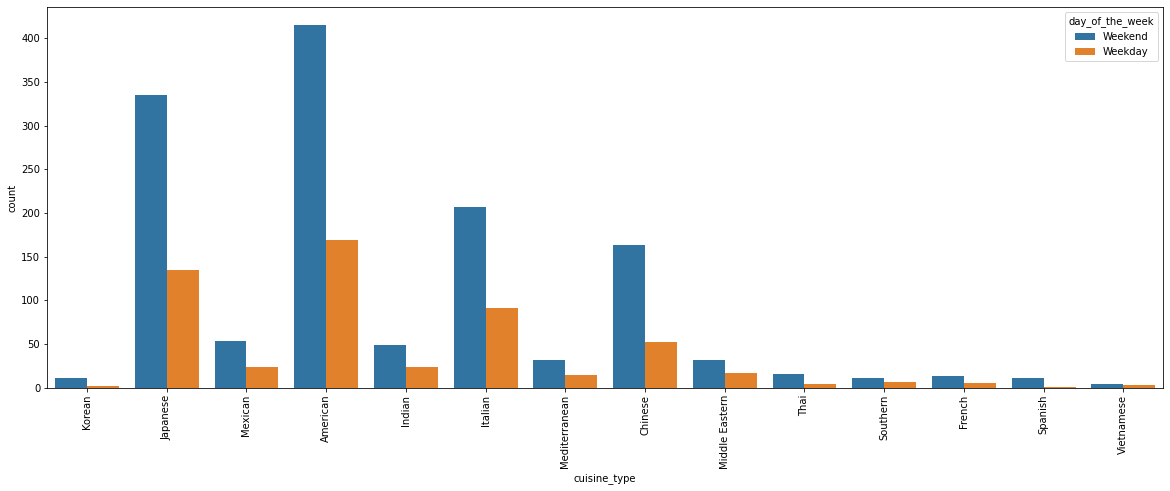

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df, x='cuisine_type',hue='day_of_the_week');
plt.xticks(rotation=90)
plt.show()

#### Observations:
 By creating a count plot with a hue that changes whether or not it is the weekend or weekday, we can see that American cuisine is the most popular on the weekend. It also happens to be the most popular on weekdays too. If i had to take a guess on why it would be because of American Fast food.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# First we need to filter out the orders greater that 20 dollars
more_than_20 = df.loc[df['cost_of_the_order'] > 20]
# The we need to turn that number into a percent, by dividing it by the total number of orders and multiplying by 100
percent = more_than_20['order_id'].count()/1898 *100
# Then we print the percent statement
print("The percent of order greater than 20 dollars are", round(percent,2), "%")

The percent of order greater than 20 dollars are 29.24 %


#### Observations:
 We can see that 29.24% of order are greater than twenty dollars. It would seem that a lot of food deliveried is on the lower cost side since a majority of the order cost less than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
 By using the describe function we can see that the mean delivery time is 24.16 minutes. 

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(9)

52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
Name: customer_id, dtype: int64

#### Observations:
 The top 5 most frequent customers have the IDs of 52832, 47440, 83287, 250494, and 259341. However, there is a tie for 5th most frequent customer between 259341, 82041, 65009, and 276192 all with 7 orders. The company would have to decide whether to give the voucher to everyone tied in 5th or just one customer.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


###Heatmap

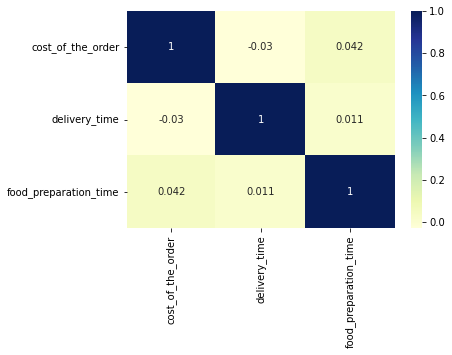

In [ ]:
corr_list = ['cost_of_the_order','delivery_time','food_preparation_time','day_of_the_week','rating']
sns.heatmap(data=df[corr_list].corr(), annot = True, cmap='YlGnBu');
# The heat map does not really show us much there is not a strong negative or positive corralation between these three variables.

## Delivery_time vs. Day_of_the_week

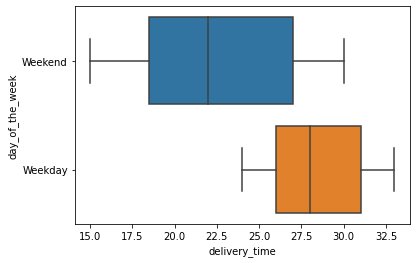

In [ ]:
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week')
#By creating two box plots to compare the delivery time depending on the day of the week we can clearly see that during the weekend the delivery times are shorter.

##Rating vs. Delivery_time

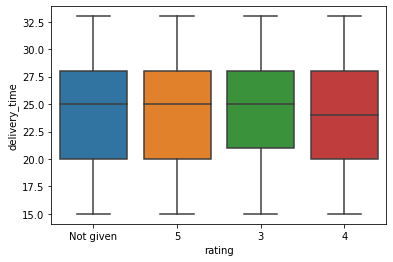

In [ ]:
sns.boxplot(data=df,x='rating',y='delivery_time')
#The box plot comparing the delivery time and the rating given does not really show much. For some reason the 4 star rating has a lower median than the 3 star which is odd.

##Cost_of_order vs. Cuisine_type

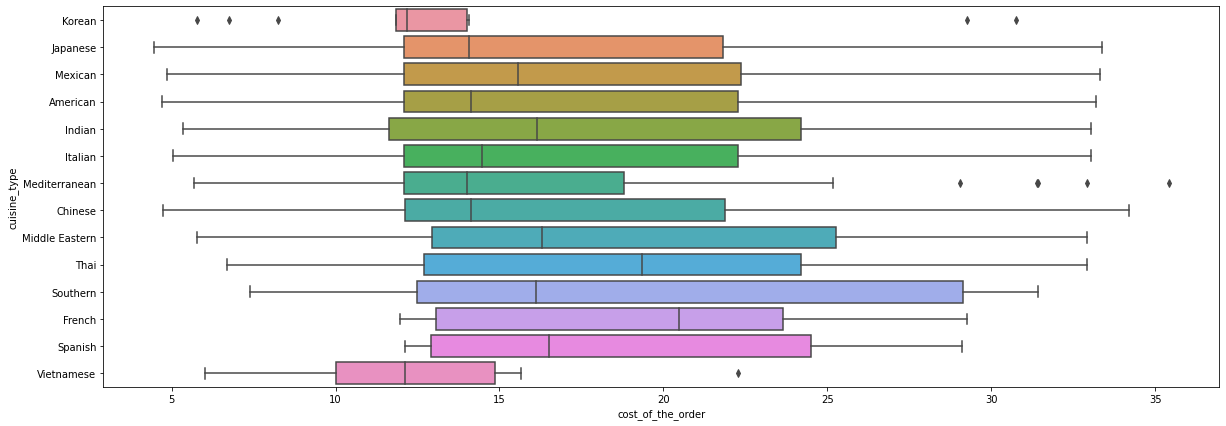

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
#The box plot of the cost of the order compared to the type of food can let us see which cuisine is the most expensive and the least expensive.
#For example, Korean and vietnamese are on the cheaper side while French and Thai are on the expensive side.

##Food_preparation_time vs. Cuisine_time

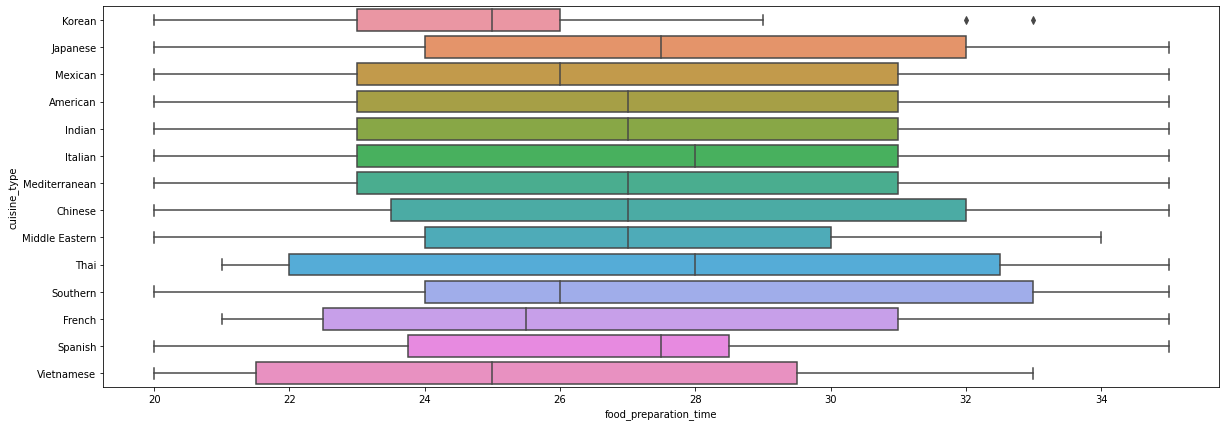

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df,x='food_preparation_time', y='cuisine_type')
plt.show()
#Using this boxplot we can compare the prepartion time within different cuisine types.
#As we can see Korean and Vietnamese food take the least amount of time and this could also relate to the last graph. As the food takes less time then the cost will go down.

###Cuisine_type Vs. Day_of_the_week

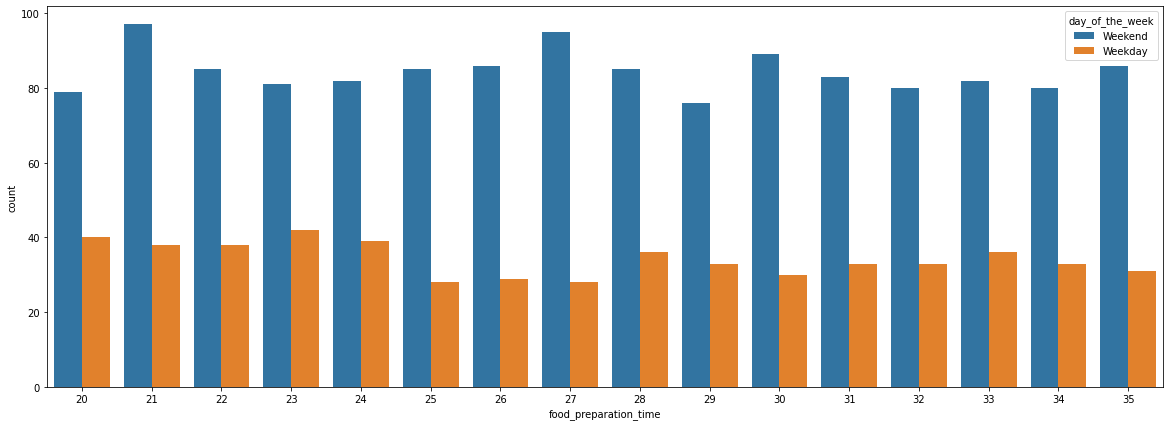

In [ ]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,x='food_preparation_time', hue='day_of_the_week')
# It is interesting that the food preparation time is greater much greater on the weekend and not very similar to the weekday. 
# It is probably due to the increase in order during the weekend.
# But the faster delivery time on the weekend must even out the total time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
rated_restaurant = df[df['rating'] != 'Not given']
#We only want real ratings so get rid of all Not Given ratings
promo = rated_restaurants.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
promo_above_50 = promo.loc[promo['rating'] > 50]
#Theses are the restaurants that have the number of ratings greater than 50. Next we need to make sure that the average rating is above 4.
promo_above_50.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()
#Then filter by the mean of 4

,restaurant_name,rating
0,Shake Shack,133.0
1,The Meatball Shop,84.0
2,Blue Ribbon Sushi,73.0
3,Blue Ribbon Fried Chicken,64.0


#### Observations:
 The restaurants that qualified for the promational off are Shake SHack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken since they were rated more than 50 times. Then they had the correct mean greater than 4 so the were all offered the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# We first have to sey up a function that will filter whether the cost of the order was above 20 dollars or above 5 dollars to calculate the revenue.
def revenue(x):
  if x > 20:
      return x * 0.25
  elif x > 5:
      return x * 0.15
  else:
      return 0

# Then use the function to calculate the revenue
df['revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# You can also use this to find the total sum of the revenue
print('The total revenue is', df['revenue'].sum())

The total revenue is 6166.303


#### Observations:
 We have created a function to calculate the revenue on every order then found the total revenue of every order and created a new column in our data fram for the revenue. We can see that the total revenue was about 6166.30$ in this data set.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#  To find the total time we just need to add the preparation time and the delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# Using df.head() to make sure that it worked in created a new column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385,49


In [ ]:
# Used kind of the same method as in question 9
more_than_60_minutes = df.loc[df['total_time'] > 60]
percent_60 = more_than_60_minutes['order_id'].count()/1898 *100
print("The percent of order greater than 60 minutes are", round(percent_60,2), "%")

The percent of order greater than 60 minutes are 10.54 %


#### Observations:
 By combining the food preparation time and delivery time we can find out how long order actually take. We also used this information to find out that 10.54% of order take longer than 60 minutes. Which all this considered is seems really good that only 10 percent takes longer for preparation and delivery.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# First we calculate the mean of the weekday and weekend then we print out statement for each.
weekday_mean = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
weekend_mean = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print('The average delivery time during the weekdays is', round(weekday_mean,2), 'minutes')
print('The average delivery time during the weekend is', round(weekend_mean,2), 'minutes')

The average delivery time during the weekdays is 28.34 minutes
The average delivery time during the weekend is 22.47 minutes


#### Observations:
By calculating the average delivery time of the weekday versus the weekend we can see that delivery times are quicker on the weekends. Not sure why there would be faster delivery times on the weekends when there is more deliveries. Maybe there are more workers or less traffic. 

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  By doing a analysis of FoodHub's data, there are numerous variable that one must look at in order to make benefitial suggestions towards the future of the company. I believe that I touched on some value information that will help me make recommendation. For example, the realationships between two variables, percentage statistics, created many visual representations that are useful in backing up my recommendations.
* I enjoyed looking at the data on my own and experimenting with the possiblities especially with multivariate analysis because there can be some really interesting comparisons and graphs. All that can help me understand the how the company is doing and ways to improve on it.

### Recommendations:

*  Although some variables cannot be directly influenced such as food preparation time and delivery time, I would recommend the company to give a small discount to any order that goes past 60 minutes. Since its only around 10% of orders, a small discount would insure thaat those customers that had to wait longer than usual would be coming back.
* I would also recommend that the company continues to reinforce trends. Since American food is the most popular make a voucher to those to order it; thus, they will order more, or with the top three cuisines.
* Or conversely try to increase a statistic the company might want higer. For example, since most sales happen on the weekend, promote a discount for the weekdays for those who order on weekends to try and get the weekend buys to buy during the week.


---